In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
# load dataset

data = pd.read_csv('dataset_2.csv', nrows=50000)
data.shape

(50000, 109)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

<AxesSubplot:>

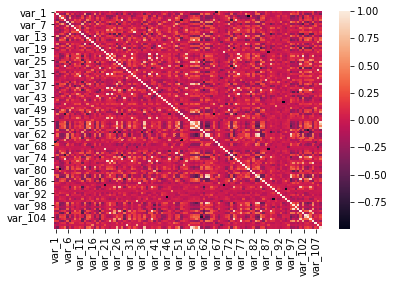

In [6]:
sns.heatmap(X_train.corr(method = 'pearson'))

<AxesSubplot:>

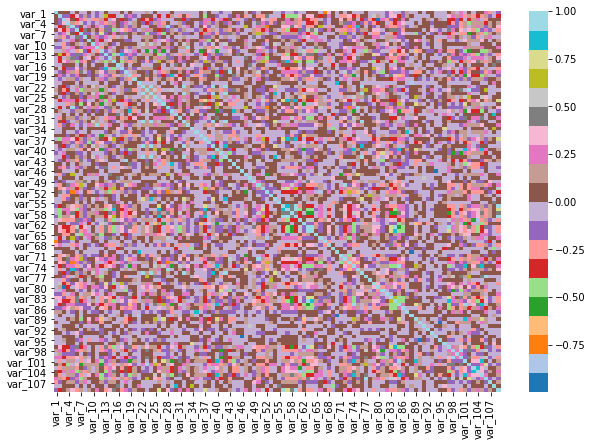

In [11]:
plt.figure(figsize=(10,7))
a = X_train.corr(method = 'pearson')
cmap = 'tab20'
sns.heatmap(a,cmap = cmap)

In [12]:
c = 0

for i in a.loc['var_40']:
    if i > 0.8:
        print(a.columns[c] , i)
    c = c + 1

var_40 1.0
var_74 0.8831191655903585
var_85 0.8340503905506552
var_101 0.8846845198617836
var_105 0.8691044024208836


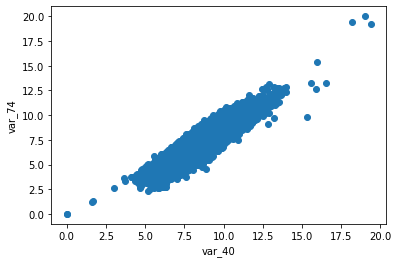

In [13]:
plt.scatter(X_train['var_40'], X_train['var_74'])
plt.ylabel('var_74')
plt.xlabel('var_40')
plt.show()

### Brute force approach

In [19]:
def corre(data , threshold):
    col_corr = set()
    
    sol = data.corr()
    
    for i in range(len(sol.columns)):
        for j in range(i):
            if abs(sol.iloc[i,j]) > threshold:
                print((abs(sol.iloc[i,j]), sol.columns[i] , sol.columns[j]))
                col = sol.columns[j]
                col_corr.add(col)
    return col_corr

In [21]:
k = corre(X_train,0.8)
len(k)

(0.8632980418993791, 'var_17', 'var_13')
(0.9813409653986921, 'var_24', 'var_22')
(0.9536721652384935, 'var_28', 'var_5')
(0.8341792843814466, 'var_29', 'var_19')
(0.990430734999363, 'var_32', 'var_22')
(0.9804113632495293, 'var_32', 'var_24')
(0.9443605986205844, 'var_33', 'var_11')
(0.9744609333741678, 'var_39', 'var_22')
(0.9431153866790611, 'var_39', 'var_24')
(0.9748779191363224, 'var_39', 'var_32')
(0.91910579117498, 'var_42', 'var_22')
(0.9672922649953389, 'var_42', 'var_24')
(0.9199183443060952, 'var_42', 'var_32')
(0.8567453370818933, 'var_42', 'var_39')
(0.9654741987814475, 'var_43', 'var_18')
(0.8358214281472581, 'var_44', 'var_29')
(0.8150241475398633, 'var_54', 'var_24')
(0.8287090109274785, 'var_54', 'var_42')
(0.837404481636077, 'var_57', 'var_15')
(0.8318090759398273, 'var_57', 'var_26')
(0.8207993837973238, 'var_57', 'var_37')
(0.8440857367712562, 'var_57', 'var_56')
(0.8131947525226287, 'var_59', 'var_26')
(0.8306144274586774, 'var_59', 'var_37')
(0.9757443944210573, 

40

In [22]:
X_train.drop(labels=k,axis = 1,inplace=True)

In [23]:
X_train.shape

(35000, 68)